<a href="https://colab.research.google.com/github/RuanRodrigues10000/ML_RUAN/blob/master/ecomerc_ofc_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importar bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/Ecommerce Customers')
df


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

PLOTS


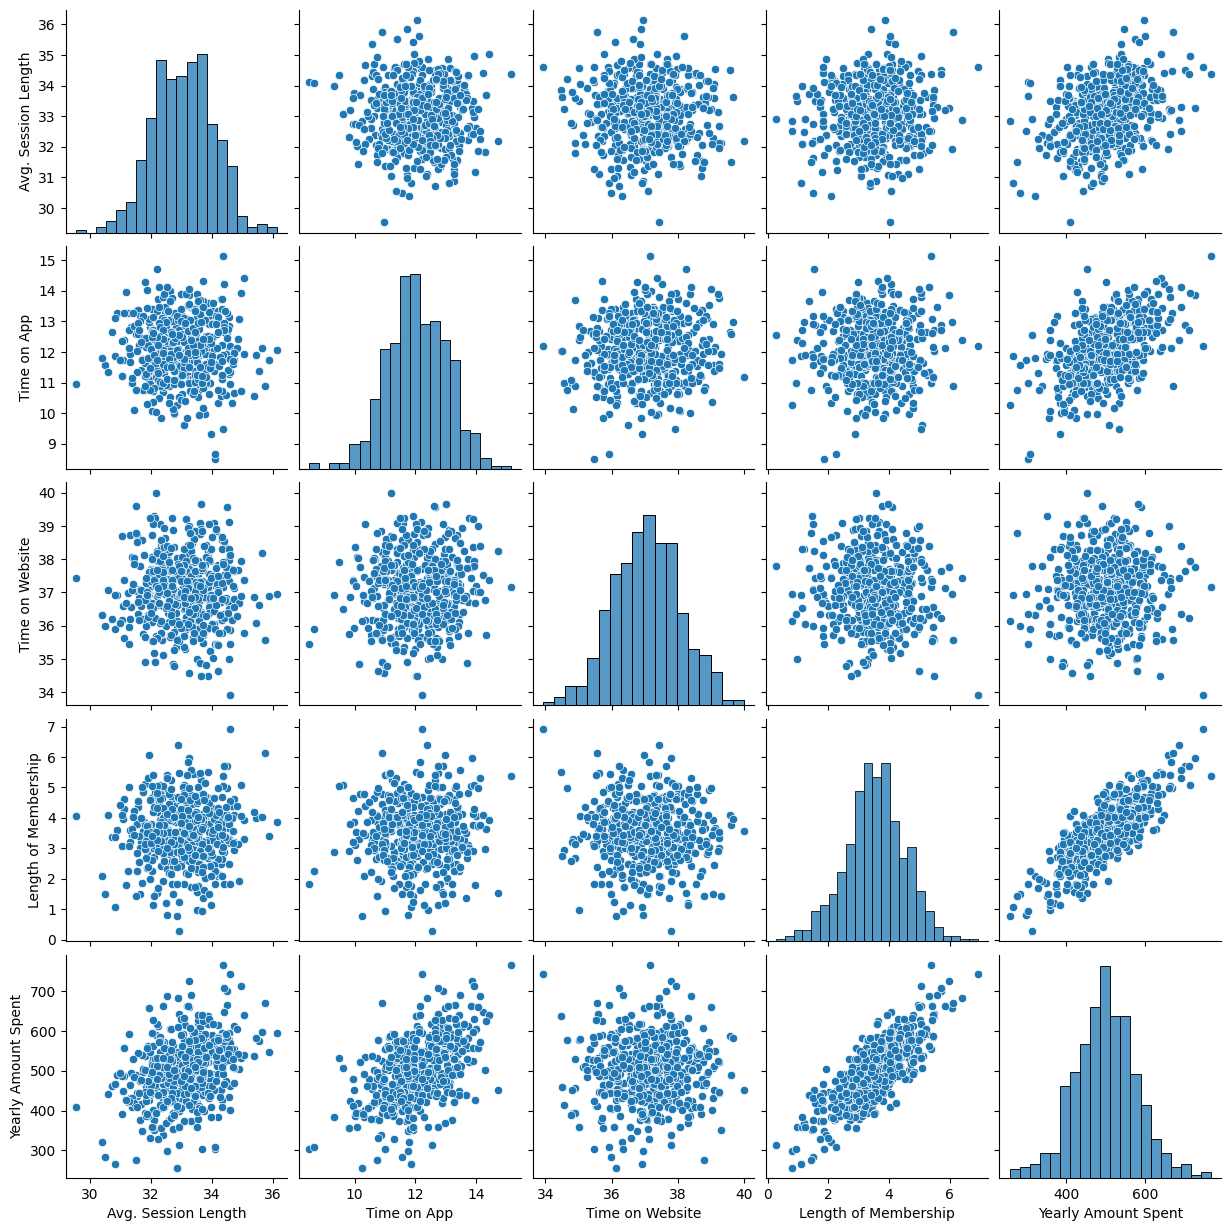

In [ ]:
sns.pairplot(df)

### Training linear regression model

In [ ]:
X = df[[ 'Time on App',
       'Time on Website']]
Y = df['Yearly Amount Spent']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

##Model evaluation

In [ ]:
cof = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
cof

,Coefficient
Time on App,39.056428
Time on Website,-2.243310


Time on App (Tempo no Aplicativo): Para cada aumento de 1 unidade no tempo gasto no aplicativo, espera-se um aumento de aproximadamente $39.06 na quantidade anual gasta pelo cliente, mantendo todas as outras variáveis constantes.

Time on Website (Tempo no Site): Para cada aumento de 1 unidade no tempo gasto no site, espera-se uma diminuição de aproximadamente $2.24 na quantidade anual gasta pelo cliente, mantendo todas as outras variáveis constantes.

Isso sugere que o tempo gasto no aplicativo tem uma influência positiva significativa na quantidade anual gasta pelo cliente, enquanto o tempo gasto no site tem uma influência negativa, embora menor, na quantidade anual gasta. pode indicar que a empresa pode querer focar mais em melhorar a experiência do aplicativo móvel em comparação com o site, se o objetivo for aumentar as vendas.





 o numero negativo no site, significa que, mantendo todas as outras variáveis constantes, um aumento no tempo gasto no site está associado a uma diminuição no valor gasto anualmente pelos clientes.

que pode ser interpretado como indicativo de que o tempo gasto no site não está contribuindo positivamente para o valor gasto anualmente pelos clientes. Ou seja, clientes que passam mais tempo no site podem estar gastando menos anualmente em comparação com clientes que passam menos tempo no site.

Essa observação pode sugerir que o site pode não estar tão eficaz quanto o aplicativo móvel em influenciar os clientes a gastarem mais com a empresa. Nesse caso, pode ser necessário revisar e melhorar a experiência do usuário no site para aumentar o engajamento e, consequentemente, os gastos dos clientes.






##PREDIÇÃO

In [ ]:
pred = lm.predict(X_test)

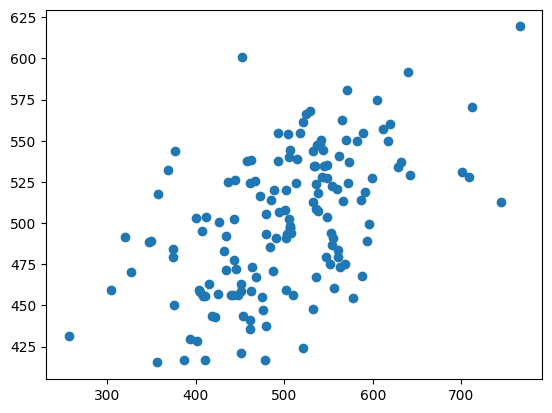

In [ ]:
plt.scatter(y_test,pred)

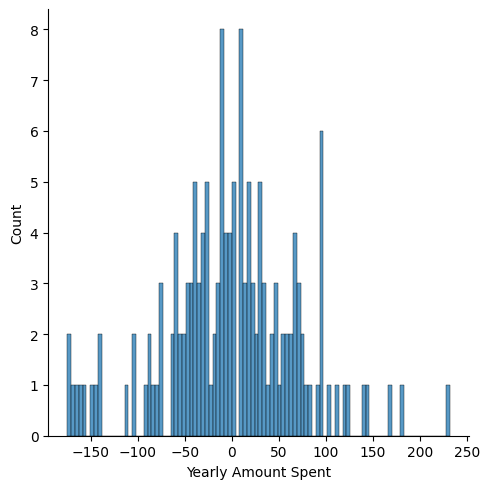

In [ ]:
sns.displot((y_test-pred),bins=100)

In [ ]:
print('MAE: ',metrics.mean_absolute_error(y_test,pred))
print('MSE: ',metrics.mean_squared_error(y_test,pred))
print('RSME:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE:  54.60750251531469
MSE:  5201.2209076553345
RSME: 72.11949048388608





MAE (Mean Absolute Error): O erro médio absoluto é a média das diferenças absolutas entre as previsões do modelo e os valores reais. Neste caso, o MAE é aproximadamente $54.61.

Isso significa que, em média, as previsões do modelo diferem do valor real em cerca de $54.61.

MSE (Mean Squared Error): O erro médio quadrático é a média das diferenças quadráticas entre as previsões do modelo e os valores reais. Neste caso, o MSE é aproximadamente 5201.22.

RMSE (Root Mean Squared Error): O erro quadrático médio é a raiz quadrada do MSE e fornece uma interpretação na mesma unidade da variável dependente. Neste caso, o RMSE é aproximadamente 72.12. Isso significa que, em média, as previsões do modelo diferem do valor real em cerca de $72.12.

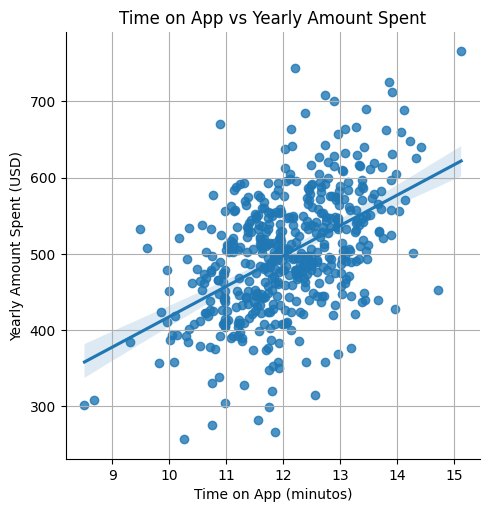

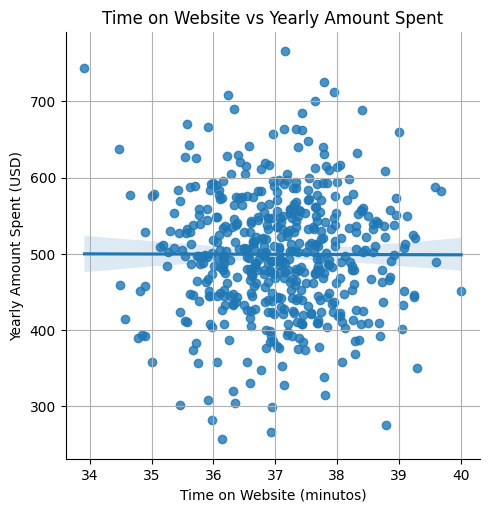

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de regressão para Time on App vs Yearly Amount Spent
sns.lmplot(x='Time on App', y='Yearly Amount Spent', data=df)
plt.title('Time on App vs Yearly Amount Spent')
plt.xlabel('Time on App (minutos)')
plt.ylabel('Yearly Amount Spent (USD)')
plt.grid(True)
plt.show()

# Gráfico de regressão para Time on Website vs Yearly Amount Spent
sns.lmplot(x='Time on Website', y='Yearly Amount Spent', data=df)
plt.title('Time on Website vs Yearly Amount Spent')
plt.xlabel('Time on Website (minutos)')
plt.ylabel('Yearly Amount Spent (USD)')
plt.grid(True)
plt.show()

USANDO OUTRA VARIAVEL ALVO


In [ ]:
X = df[[ 'Time on App',
       'Time on Website']]
Y = df['Length of Membership']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
cof = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
cof

,Coefficient
Time on App,0.037191
Time on Website,-0.053407


In [ ]:
pred = lm.predict(X_test)

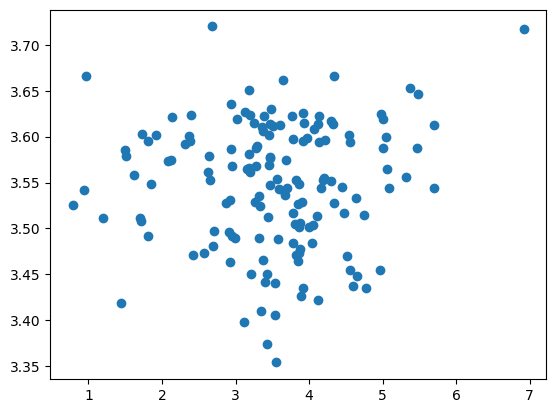

In [ ]:
plt.scatter(y_test,pred)

In [ ]:
print('MAE: ',metrics.mean_absolute_error(y_test,pred))
print('MSE: ',metrics.mean_squared_error(y_test,pred))
print('RSME:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE:  0.7799765976371755
MSE:  1.0674283315226782
RSME: 1.033164232599386
